# Project: Investigate a Dataset (IMDB movie Database - 'TMdb Movies')

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Useful Variables
> 1. id
> 2. revenue
> 3. budget
> 4. popularity
> 5. vote-average
> 6. vote-count
> 7. year
> 8. genre

### New columns
> 1. success_factor - revenue/budget
> 2. vote_factor - (vote_average * 1000)/vote_count
> 3. factor - Dependent Variable

In [1]:
# Use this cell to set up import statements for all of the packages that you

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb_movies.csv', header = 0)
df.head() # Checking the initial contents of DataFrame
#   types and look for instances of missing or possibly errant data.
df.describe() # Exploring the different Variables 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [3]:
df.info() # Checking the datatypes of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.isnull().sum() # Checking for null values

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Total Rows - 10866

### Useful Variables
                    
> 1. id -> Type - int || Null Values - 0
> 2. revenue ->      Type - int  ||     Null Values - 0
> 3. budget ->       Type - int  ||    Null Values - 0
> 4. popularity ->   Type - float  ||    Null Values - 0
> 5. vote_average -> Type - float  ||    Null Values - 0
> 6. vote_count ->   Type - int  ||    Null Values - 0
> 7. year ->   Type - int  ||    Null Values - 0
> 8. genre -> Type - object || Null Values - 23

## Data Cleaning (Removal of useless columns)
### Steps
1. Create a new DataFrame from old dataframe
2. Select only the useful columns
> ### Useful Variables
> 1. id
> 2. revenue
> 3. budget
> 4. popularity
> 5. vote-average
> 6. vote-count
> 7. year
> 8. genre

3. Addition of new columns
> ### New columns
> 1. success_factor - revenue/budget
> 2. vote_factor - (vote_average * 1000)/vote_count

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_new = df[['id','popularity','budget','revenue','genres','release_year','vote_count','vote_average']].copy()
df_new.head()

,id,popularity,budget,revenue,genres,release_year,vote_count,vote_average
0,135397,32.985763,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,2015,5562,6.5
1,76341,28.419936,150000000,378436354,Action|Adventure|Science Fiction|Thriller,2015,6185,7.1
2,262500,13.112507,110000000,295238201,Adventure|Science Fiction|Thriller,2015,2480,6.3
3,140607,11.173104,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.5
4,168259,9.335014,190000000,1506249360,Action|Crime|Thriller,2015,2947,7.3


In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
id              10866 non-null int64
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
genres          10843 non-null object
release_year    10866 non-null int64
vote_count      10866 non-null int64
vote_average    10866 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 679.2+ KB


In [7]:
df_new.isnull().sum()

id               0
popularity       0
budget           0
revenue          0
genres          23
release_year     0
vote_count       0
vote_average     0
dtype: int64

Since **23** Null Values are present in the ***Genre***  column, so **dropping** the null values

In [8]:
df_new.dropna(inplace = True) 
df_new.isnull().sum()

id              0
popularity      0
budget          0
revenue         0
genres          0
release_year    0
vote_count      0
vote_average    0
dtype: int64

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 8 columns):
id              10843 non-null int64
popularity      10843 non-null float64
budget          10843 non-null int64
revenue         10843 non-null int64
genres          10843 non-null object
release_year    10843 non-null int64
vote_count      10843 non-null int64
vote_average    10843 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 762.4+ KB


### Adding New Columns
> 1. success Factor
> 2. vote_factor
> 3. factor

Creating **'success_factor'**

In [10]:
df_new['success_factor'] = (df_new['revenue'] + 0.01)/(df_new['budget']+0.01)
df_new['success_factor'].describe()

count    1.084300e+04
mean     1.631930e+08
std      1.037763e+09
min      6.666667e-11
25%      1.000000e+00
50%      1.000000e+00
75%      2.447240e+00
max      2.536254e+10
Name: success_factor, dtype: float64

Creating **'vote_factor'**

In [11]:
df_new['vote_factor'] = (df_new['vote_average']*1000)/df['vote_count']
df_new['vote_factor'] = 0 + ((df_new['vote_factor'] - df_new['vote_factor'].min()) * (1-0) / (df_new['vote_factor'].max() - df_new['vote_factor'].min()))
df_new['vote_factor'].describe()

count    10843.000000
mean         0.235727
std          0.211669
min          0.000000
25%          0.046783
50%          0.175214
75%          0.387020
max          1.000000
Name: vote_factor, dtype: float64

Creating **'factor'**

In [12]:
vote_mean = df_new['vote_factor'].mean()
vote_mean

success_mean = df_new['success_factor'].mean()
df_new['vote_factor'] >= vote_mean

df_new['success_factor'] >= success_mean

df_new['factor'] = (df_new['success_factor'] >= success_mean) & (df_new['vote_factor'] >= vote_mean)
df_new.columns
df_new['factor'] = df_new['factor'].astype(int)
df_new['factor'].value_counts()

0    10615
1      228
Name: factor, dtype: int64

Converting Genres ***categorical*** values to ***quantitative*** values

In [13]:
df_new['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

## Splitting values of *Genre* Column

In [14]:
#df_new = pd.DataFrame(df_new['genres'].row.str.split('|',1).tolist())

df_new['genres'] = df_new['genres'].str.split('|')

### Creating new columns of different Genres

In [15]:
#for index, list in df_new['genres'].index, df_new['genres'] :
#df_new.iloc[0, df_new.columns.get_loc('Action')] = 1
index = df_new.index.tolist()
i = index[0]
df_new['genre_action'] = ""
df_new['genre_thriller'] = ""
df_new['genre_adventure'] = ""
df_new['genre_sci_fic'] = ""
df_new['genre_crime'] = ""
df_new['genre_horror'] = ""
df_new['genre_fantasy'] = ""
df_new['genre_doc'] = ""
df_new['genre_drama'] = ""
df_new['genre_mystery'] = ""
df_new['genre_comedy'] = ""
df_new['genre_romance'] = ""
df_new['genre_family'] = ""
df_new['genre_western'] = ""
df_new['genre_anim'] = ""
for list in df_new['genres'] :
    #....................action_genre...................
    if 'Action' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_action')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_action')] = 0
    #...................Thriller_genre...................
    if 'Thriller' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_thriller')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_thriller')] = 0
    if 'Adventure' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_adventure')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_adventure')] = 0
    if 'Science Fiction' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_sci_fic')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_sci_fic')] = 0
    if 'Crime' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_crime')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_crime')] = 0
    if 'Horror' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_horror')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_horror')] = 0
    if 'Fantasy' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_fantasy')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_fantasy')] = 0
    if 'Documentary' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_doc')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_doc')] = 0
    if 'Drama' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_drama')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_drama')] = 0
    if 'Mystery' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_mystery')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_mystery')] = 0
    if 'Comedy' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_comedy')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_comedy')] = 0
    if 'Romance' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_romance')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_romance')] = 0
    if 'Family' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_family')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_family')] = 0
    if 'Western' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_western')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_western')] = 0
    if 'Animation' in list :
        df_new.iloc[i, df_new.columns.get_loc('genre_anim')] = 1
    else :
        df_new.iloc[i, df_new.columns.get_loc('genre_anim')] = 0
    i = i+1
#df_new['genre_action'].value_counts()

In [16]:
df_new.columns

Index([u'id', u'popularity', u'budget', u'revenue', u'genres', u'release_year',
       u'vote_count', u'vote_average', u'success_factor', u'vote_factor',
       u'factor', u'genre_action', u'genre_thriller', u'genre_adventure',
       u'genre_sci_fic', u'genre_crime', u'genre_horror', u'genre_fantasy',
       u'genre_doc', u'genre_drama', u'genre_mystery', u'genre_comedy',
       u'genre_romance', u'genre_family', u'genre_western', u'genre_anim'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Most popular "Genre" ?)

**Question**
> Which one is the most **popular Genre** ?

In [20]:
#df_new.apply(pd.value_counts)
df_new.columns.values

counts = [df_new['genre_action'].value_counts(),df_new['genre_thriller'].value_counts(),df_new['genre_adventure'].value_counts(), 
          df_new['genre_sci_fic'].value_counts(), df_new['genre_crime'].value_counts(), df_new['genre_horror'].value_counts(),
         df_new['genre_fantasy'].value_counts(), df_new['genre_doc'].value_counts(), df_new['genre_drama'].value_counts(), 
         df_new['genre_mystery'].value_counts(), df_new['genre_comedy'].value_counts(), df_new['genre_romance'].value_counts(),
         df_new['genre_family'].value_counts(), df_new['genre_western'].value_counts(), df_new['genre_anim'].value_counts()]

for item in counts:
    print item

0    8458
1    2385
Name: genre_action, dtype: int64
0    7935
1    2908
Name: genre_thriller, dtype: int64
0    9372
1    1471
Name: genre_adventure, dtype: int64
0    9613
1    1230
Name: genre_sci_fic, dtype: int64
0    9488
1    1355
Name: genre_crime, dtype: int64
0    9206
1    1637
Name: genre_horror, dtype: int64
0    9927
1     916
Name: genre_fantasy, dtype: int64
0    10323
1      520
Name: genre_doc, dtype: int64
0    6082
1    4761
Name: genre_drama, dtype: int64
0    10033
1      810
Name: genre_mystery, dtype: int64
0    7050
1    3793
Name: genre_comedy, dtype: int64
0    9131
1    1712
Name: genre_romance, dtype: int64
0    9612
1    1231
Name: genre_family, dtype: int64
0    10678
1      165
Name: genre_western, dtype: int64
0    10144
1      699
Name: genre_anim, dtype: int64


The most ***popular Genre*** is 
> ## Drama

In [21]:
df_new.columns

Index([u'id', u'popularity', u'budget', u'revenue', u'genres', u'release_year',
       u'vote_count', u'vote_average', u'success_factor', u'vote_factor',
       u'factor', u'genre_action', u'genre_thriller', u'genre_adventure',
       u'genre_sci_fic', u'genre_crime', u'genre_horror', u'genre_fantasy',
       u'genre_doc', u'genre_drama', u'genre_mystery', u'genre_comedy',
       u'genre_romance', u'genre_family', u'genre_western', u'genre_anim'],
      dtype='object')

### Research Question 2  (Success factor vs Release year)

**Question**
> Is there any **increase in profit of revenue** of movies **with respect to years** ?

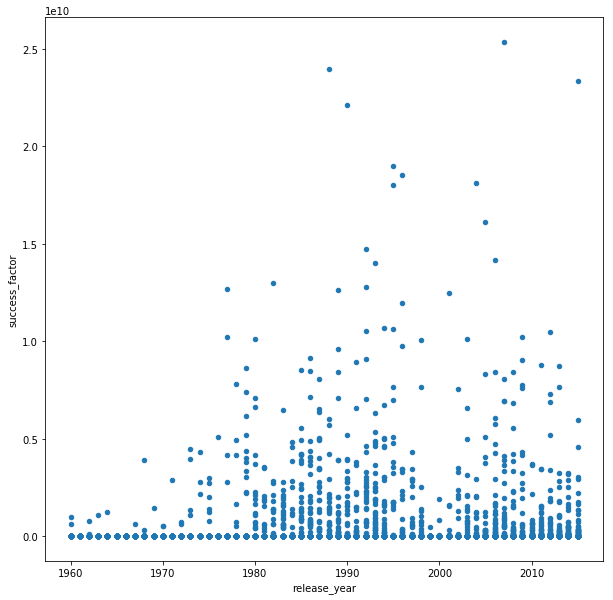

In [22]:
df_new.plot(x='release_year', y='success_factor', figsize = (10,10) , kind = 'scatter');

# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

From the above *Scatter plot*, it can be seen the Success factor has increased over the passage of time, this can be the result of increase in the literacy rate of people which resulted in increase of employment and increase in income of people world-wide.

### Research Question 3 (Successful movies with above average votes)

**Question**
> How many movies have been successful and also have above average Voting factor ?

#### **Independent Variables**
> 1. budget
> 2. revenue
> 3. vote counts
> 4. vote average

#### **Intermediate Dependent Variables**
> 1. success_factor
> 2. vote_factor

#### **Final Dependent Variables**
> 1. factor


In [23]:
df_new['factor'].value_counts()

0    10615
1      228
Name: factor, dtype: int64

#### There are total 228 movies which have earned greater revenue than their budget and also have above average voting count

### Research Question 4 (Average Popularity ?)

**Question**
> What's the average popularity of Successful movies ?

In [24]:
df_new[df_new['factor'] == 1].describe()

,id,popularity,budget,revenue,release_year,vote_count,vote_average,success_factor,vote_factor,factor,...,genre_horror,genre_fantasy,genre_doc,genre_drama,genre_mystery,genre_comedy,genre_romance,genre_family,genre_western,genre_anim
count,228.000000,228.000000,228.0,2.280000e+02,228.000000,228.000000,228.000000,2.280000e+02,228.000000,228.0,...,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,23061.697368,0.288425,0.0,1.440235e+07,1990.539474,17.903509,5.903070,1.440235e+09,0.421646,1.0,...,0.092105,0.070175,0.035088,0.521930,0.070175,0.429825,0.254386,0.105263,0.021930,0.013158
std,21581.284907,0.164624,0.0,1.443503e+07,9.892961,6.165799,0.841511,1.443503e+09,0.135111,0.0,...,0.289811,0.256004,0.184406,0.500618,0.256004,0.496140,0.436474,0.307567,0.146777,0.114201
min,67.000000,0.037970,0.0,1.666511e+06,1960.000000,10.000000,3.100000,1.666511e+08,0.239110,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12686.500000,0.174474,0.0,4.755056e+06,1984.750000,13.000000,5.400000,4.755056e+08,0.302292,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18183.000000,0.263132,0.0,9.123446e+06,1989.000000,16.000000,6.000000,9.123446e+08,0.394133,1.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26821.750000,0.380951,0.0,1.878988e+07,1995.250000,22.250000,6.400000,1.878988e+09,0.524130,1.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,238751.000000,0.897597,0.0,1.020000e+08,2012.000000,33.000000,8.000000,1.020000e+10,0.755584,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The **average popularity** of a Successful movie is **0.288425**.

<a id='conclusions'></a>
## Conclusions

The following Conclusions can be drawn from the **Analysis** of ***TMdb Movie Reviews***
> 1. Among all of the 15 genres the **most popular Genre* is **Documentary**.
> 2. A **Positive Correlation** can be seen between **Success** (in terms of revenue per budget) and **Release Year** of all movies.
> 3. There are total **228** movies which have **earned greater revenue than their budget and also have above average voting count**.
> 4. The average popularity of a Successful movie is 0.288425.

#### Resources used as help :
> 1. StackOverflow
> 2. https://docs.python.org
> 3. https://markhneedham.com/blog/2017/07/26/pandas-valueerror-the-truth-value-of-a-series-is-ambiguous/
> 4. https://leportella.com/cheatlist/2017/11/22/pandas-cheat-list.html